<a href="https://colab.research.google.com/github/mickaelrebeau/Colab-Repo/blob/main/Cats_VS_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy
%pip install pandas
%pip install keras
%pip install beautifulsoup4
%pip install scikit-learn
%pip install matplotlib
%pip install tensorflow
%pip install opencv-python
%pip install lxml


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Importing numpy and pandas
import numpy as np
import pandas as pd
import os

# importing tensorflow and other processing liberaries
import tensorflow as tf
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import cv2

In [ ]:
directory = './archive/annotations'
annotations = os.listdir(directory)

In [ ]:
# reading Cats_Test0.xml
with open(os.path.join(directory,'Cats_Test0.xml'), 'r') as f:
        file = f.read()
        

data = BeautifulSoup(file, features="html.parser")

objects = data.find_all('object')
length = len(objects)
filename = data.find("filename").text
img_width = int(data.find('size').width.text)
img_height = int(data.find('size').height.text)

In [ ]:
xmin = int(objects[0].bndbox.xmin.text)
ymin = int(objects[0].bndbox.ymin.text)
xmax = int(objects[0].bndbox.xmax.text)
ymax = int(objects[0].bndbox.ymax.text)

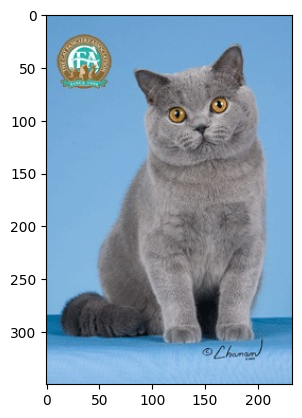

In [ ]:
img = cv2.imread("./archive/images/Cats_Test0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

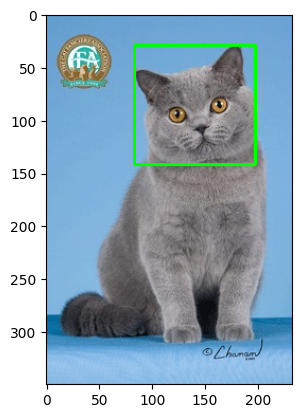

In [ ]:
img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,255,0), 2)
plt.imshow(img)

In [ ]:
h,w = img.shape[:2]

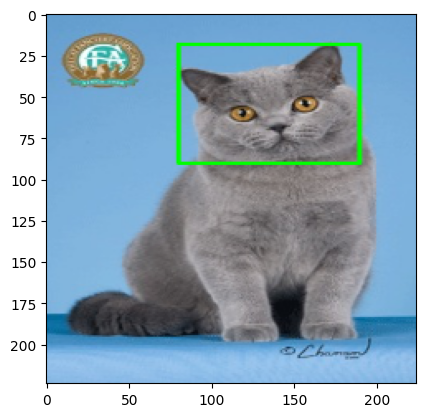

In [ ]:
xmin /= w
xmax /= w
ymin /= h
ymax /= h

img_r = cv2.resize(img, (224,224))

xmin = int(xmin*224)
xmax = int(xmax*224)
ymin = int(ymin*224)
ymax = int(ymax*224)

img_r = cv2.rectangle(img_r, (xmin,ymin), (xmax,ymax), (0,255,0), 1)
plt.imshow(img_r)

In [ ]:
records = []
for annot_file in annotations:
    
    with open(os.path.join(directory,annot_file), 'r') as f:
        file = f.read()
    data = BeautifulSoup(file, features="html.parser")
    
    objects = data.find_all('object')
    length = len(objects)
    filename = data.find("filename").text
    img_width = int(data.find('size').width.text)
    img_height = int(data.find('size').height.text)
    
    for i in range(length):
        class_name = data.find_all('object')[i].find('name').text
        xmin = int(data.find_all('object')[i].find('bndbox').find('xmin').text)/img_width
        ymin = int(data.find_all('object')[i].find('bndbox').find('ymin').text)/img_height
        xmax = int(data.find_all('object')[i].find('bndbox').find('xmax').text)/img_width
        ymax = int(data.find_all('object')[i].find('bndbox').find('ymax').text)/img_height
        
        records.append([filename,class_name,xmin,ymin,xmax,ymax])

In [ ]:
df = pd.DataFrame(records,columns=['filename','class','xmin','ymin','xmax','ymax'])
df.drop_duplicates(subset=['filename'],inplace=True)
df['class'] = df['class'].apply(lambda x: 1.0 if x=='dog' else 0.0)
df

,filename,class,xmin,ymin,xmax,ymax
0,Cats_Test0.png,0.0,0.356223,0.082857,0.845494,0.405714
1,Cats_Test1.png,1.0,0.256000,0.044000,0.480000,0.444000
2,Cats_Test10.png,1.0,0.314000,0.149333,0.528000,0.309333
3,Cats_Test100.png,0.0,0.284000,0.386667,0.412000,0.557333
4,Cats_Test1000.png,0.0,0.107463,0.028000,0.862687,0.624000
...,...,...,...,...,...,...
3682,Cats_Test995.png,1.0,0.196000,0.122667,0.358000,0.357333
3683,Cats_Test996.png,0.0,0.750000,0.158209,0.916000,0.400000
3684,Cats_Test997.png,0.0,0.384000,0.264264,0.620000,0.636637
3685,Cats_Test998.png,0.0,0.386667,0.074000,0.685333,0.330000


In [ ]:
df['class'].value_counts()

1.0    2498
0.0    1188
Name: class, dtype: int64

In [ ]:
image_directory = './archive/images/'

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
train = df.head(3000)
test = df.tail(686).reset_index(drop=True)

In [ ]:

from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

class DataGenerator(Sequence):
    
    def __init__(self, df, X, y1, y2, batch_size, img_size, directory, shuffle=False):
        self.df = df.copy()
        self.X = X
        self.y1 = y1
        self.y2 = y2
        self.directory = directory
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.n = len(self.df)
        print(f"Number of records: {self.n}")
        print(f"Number of steps: {-(self.n // -self.batch_size)}")
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        return -(self.n // -self.batch_size)
    
    def __getitem__(self,index):
    
        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X, y1, y2 = self.__get_data(batch)        
        return X, (y1,y2)
    
    def __get_data(self,batch):
        
        X,y1,y2 = [],[],[]
        for i, record in batch.iterrows():
            img = load_img(os.path.join(self.directory,record[self.X]),target_size=(self.img_size,self.img_size))
            img = img_to_array(img)
            img = img/255.
            X.append(img)
            coods = record[self.y1].values
            y1.append(coods)
            y2.append(record[self.y2])
        
        return np.array(X,dtype=np.float32),np.array(y1,dtype=np.float32),np.array(y2,dtype=np.float32)

In [ ]:
train_gen = DataGenerator(train,'filename',['xmin','ymin','xmax','ymax'],'class',32,256,image_directory)
test_gen = DataGenerator(test,'filename',['xmin','ymin','xmax','ymax'],'class',32,256,image_directory)

Number of records: 3000
Number of steps: 94
Number of records: 686
Number of steps: 22


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model, Sequential

In [ ]:
img_size = 256
base_model = InceptionV3(include_top = False,
                       weights = 'imagenet',
                       input_shape = (img_size,img_size,3))

In [ ]:
for layer in base_model.layers:
    if 'mixed7' in layer.name:
        break
    layer.trainable = False

In [ ]:
last_output = base_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output1 = Dense(4, activation='sigmoid', name='bbox_reg')(x)
output2 = Dense(1, activation='sigmoid', name='classifier')(x)
model = Model(inputs=base_model.inputs, outputs=[output1,output2])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss=['mse','binary_crossentropy'],
             loss_weights=[0.6,0.4],
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [ ]:
try:
    history = model.fit(train_gen,
                        epochs=25,
                        validation_data=test_gen,
                        callbacks=[checkpoint,earlystopping])
except KeyboardInterrupt:
    print("\nTraining Stopped")

Epoch 1/25
94/94 [==============================] - ETA: 0s - loss: 0.0482 - bbox_reg_loss: 0.0365 - classifier_loss: 0.0657 - bbox_reg_accuracy: 0.6180 - classifier_accuracy: 0.9747
Epoch 1: val_loss improved from inf to 0.01409, saving model to model.h5
94/94 [==============================] - 161s 2s/step - loss: 0.0482 - bbox_reg_loss: 0.0365 - classifier_loss: 0.0657 - bbox_reg_accuracy: 0.6180 - classifier_accuracy: 0.9747 - val_loss: 0.0141 - val_bbox_reg_loss: 0.0188 - val_classifier_loss: 0.0070 - val_bbox_reg_accuracy: 0.7157 - val_classifier_accuracy: 0.9985
Epoch 2/25
94/94 [==============================] - ETA: 0s - loss: 0.0154 - bbox_reg_loss: 0.0220 - classifier_loss: 0.0056 - bbox_reg_accuracy: 0.6863 - classifier_accuracy: 0.9997
Epoch 2: val_loss improved from 0.01409 to 0.00949, saving model to model.h5
94/94 [==============================] - 154s 2s/step - loss: 0.0154 - bbox_reg_loss: 0.0220 - classifier_loss: 0.0056 - bbox_reg_accuracy: 0.6863 - classifier_accu

In [ ]:
# new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
outputs = new_model.predict(test_gen)

22/22 [==============================] - 18s 791ms/step


In [ ]:
y_bbox,y_pred = outputs
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0
y_pred = y_pred.reshape(-1,)

In [ ]:
test

,filename,class,xmin,ymin,xmax,ymax
0,Cats_Test644.png,1.0,0.380000,0.213333,0.654000,0.472000
1,Cats_Test2768.png,1.0,0.216000,0.096096,0.722000,0.936937
2,Cats_Test3271.png,1.0,0.426000,0.084337,0.632000,0.355422
3,Cats_Test3353.png,0.0,0.516000,0.036036,0.796000,0.459459
4,Cats_Test26.png,1.0,0.278000,0.282667,0.456000,0.576000
...,...,...,...,...,...,...
681,Cats_Test1781.png,0.0,0.310241,0.052000,0.939759,0.456000
682,Cats_Test3025.png,1.0,0.282000,0.252252,0.672000,0.810811
683,Cats_Test3083.png,1.0,0.244444,0.046667,0.884444,0.383333
684,Cats_Test1185.png,1.0,0.350000,0.115591,0.630000,0.446237


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
filenames = test['filename'].sample(25).tolist()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

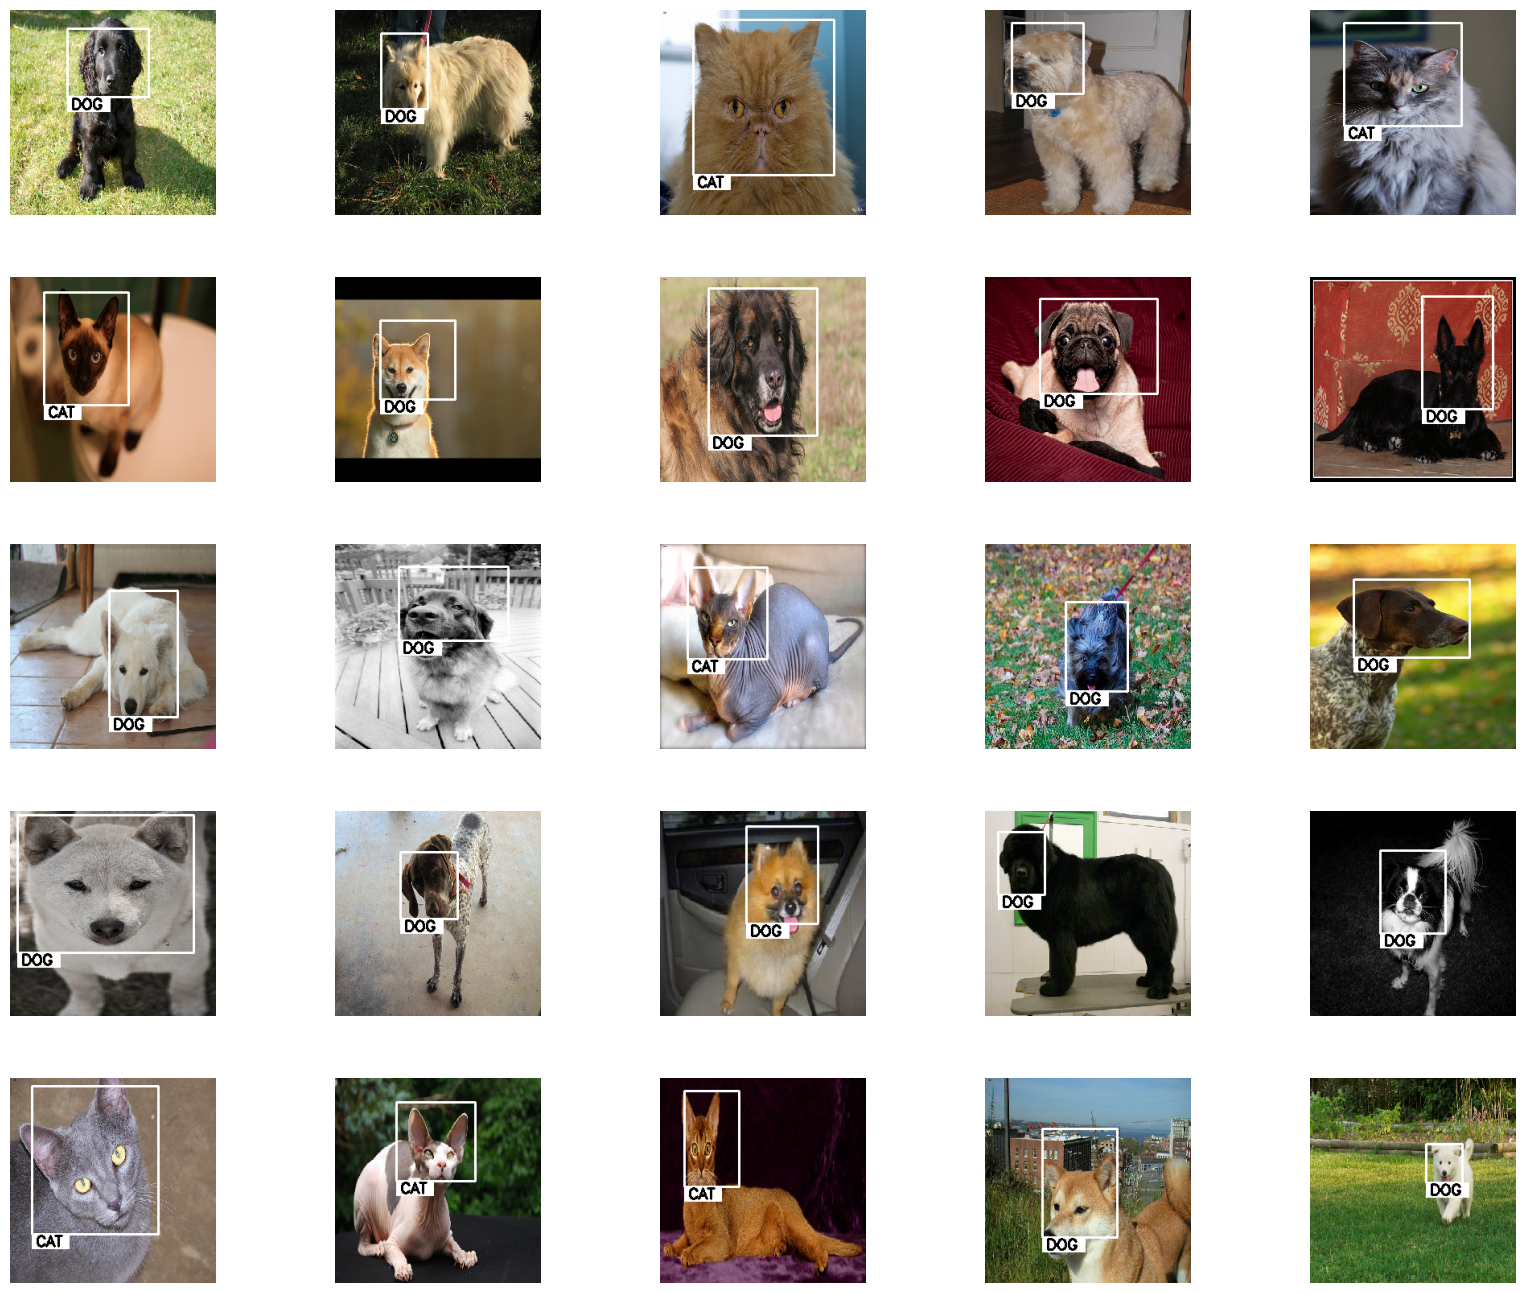

In [ ]:
labels = ['CAT','DOG']
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.8
color=(0,0,0)
thickness=2
img_size = 256

plt.figure(figsize = (20 , 20))

for ind, filename in enumerate(filenames):
    x = test[test['filename']== filename]
    label = labels[int(y_pred[x.index])]
    (width,height),b = cv2.getTextSize(label,font,fontScale,thickness)
    img = load_img(os.path.join('./archive/images/',filename),target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    for record in y_bbox[x.index]:
        xmin = int(record[0]*img_size)
        ymin = int(record[1]*img_size)
        xmax = int(record[2]*img_size)
        ymax = int(record[3]*img_size)
        img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,255,255),2)
        img = cv2.rectangle(img,(xmin,ymax),(xmin+width,ymax+height),(255,255,255),-1)
        img = cv2.putText(img,label,(xmin+5,ymax+15),font,fontScale-0.2,color,thickness,cv2.LINE_AA)

    plt.subplot(6 , 5, ind+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(img)
    plt.axis("off")